In [53]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/xk5f6txgwic" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## Q&A: what are the difference between lc/ms and lc/ms/ms

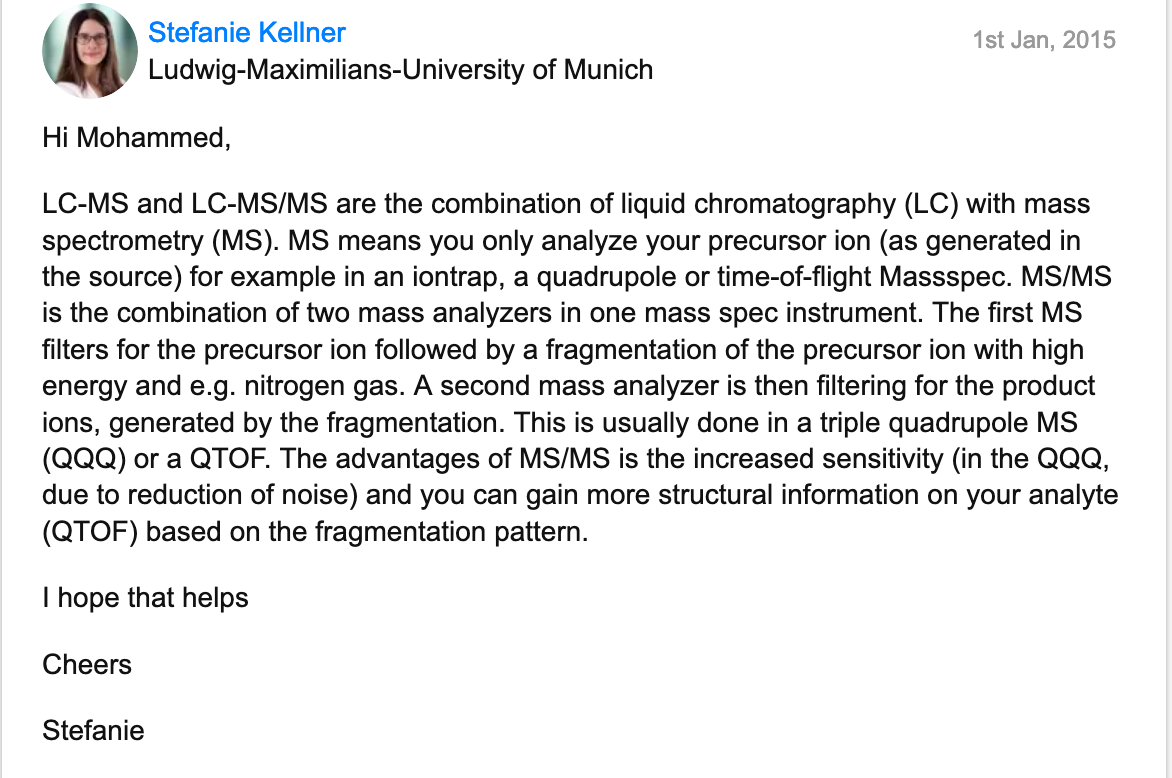

# Search the data using X! tandem

In [1]:
import ursgal
uc = ursgal.UController( params  = {'database': 'mouse_panther12.fasta'},profile = 'QExactive+')
search_result = uc.search(input_file = 'Erik_S1407_239.mzML', engine = 'xtandem_vengeance')


        -\-     UController initialized (Wed Sep 25 16:29:56 2019)     -/-
         -\-    Ursgal v0.6.1  -  https://github.com/ursgal/ursgal    -/-

[ profile  ] Initializing profile QExactive+
[ profile  ] 2 parameters have been updated
[ WARNiNG! ] Engine kojak_1_5_3 is not available in /usr/local/lib/python3.5/dist-packages/ursgal/resources/linux/64bit/kojak_1_5_3
[ WARNiNG! ] Engine kojak_percolator_2_08 is not available in /usr/local/lib/python3.5/dist-packages/ursgal/resources/linux/64bit/kojak_percolator_2_08
[ WARNiNG! ] Engine msamanda_1_0_0_5243 is not available in /usr/local/lib/python3.5/dist-packages/ursgal/resources/linux/64bit/msamanda_1_0_0_5243
[ WARNiNG! ] Engine msamanda_1_0_0_6300 is not available in /usr/local/lib/python3.5/dist-packages/ursgal/resources/linux/64bit/msamanda_1_0_0_6300
[ WARNiNG! ] Engine msamanda_1_0_0_7504 is not available in /usr/local/lib/python3.5/dist-packages/ursgal/resources/linux/64bit/msamanda_1_0_0_7504
[ WARNiNG! ] Engine msamanda_2_0

Converting file:
	mzml : /home/user/Erik_S1407_239.mzML
	to
	mgf : /home/user/Erik_S1407_239.mgf
File :           Erik_S1407_239.mzML            : Processing spectrum 69000
Wrote 59983 mgf entries to file /home/user/Erik_S1407_239.mgf
[ POSTFLGH ] Executing postflight sequence ...
[ postflig ] Execution time 0.000 seconds
[ mzml2mgf ] Execution time 2.509 minutes
[ dmpjson  ] Preparing json dump
[   md5    ] Calculating md5 for Erik_S1407_239.mgf ....
[ dmpjson  ] Json dumped. Path: /home/user/Erik_S1407_239.mgf.u.json
[ profile  ] Initializing profile QExactive+
[ profile  ] 2 parameters have been updated
[  prprun  ] Preparing unode run for engine xtandem_vengeance on file(s) /home/user/Erik_S1407_239.mgf
[ set_ios  ] Setting self.io["input"]
[   Info   ] Generated engine xtandem_vengeance output file name: /home/user/xtandem_vengeance/Erik_S1407_239_xtandem_vengeance.xml.gz
[   Info   ] search_mgf() scheduled on input file Erik_S1407_239.mgf
[   Info   ] Reason for run: Never execut

[ unify_cs ] Buffering csv file
[ unify_cs ] Buffering csv file done
Merging rows of the same PSM...mber: 38000/38122 

[ POSTFLGH ] Executing postflight sequence ...
[ postflig ] Execution time 0.000 seconds
[ unify_cs ] Execution time 18.222 seconds
[ dmpjson  ] Preparing json dump
[   md5    ] Calculating md5 for Erik_S1407_239_xtandem_vengeance_pmap_unified.csv ....
[ dmpjson  ] Json dumped. Path: /home/user/xtandem_vengeance/Erik_S1407_239_xtandem_vengeance_pmap_unified.csv.u.json


# Read the results and store in a pandas data frame

In [2]:
import pandas
unif = pandas.read_csv("/home/user/xtandem_vengeance/Erik_S1407_239_xtandem_vengeance_pmap_unified.csv")
print("Data fram size: %s x %s\n"%(unif.shape[0],unif.shape[1]))
print("Columns in data frame:\n\n%s"%("\n".join(unif.columns)))

Data fram size: 34659 x 23

Columns in data frame:

Raw data location
Spectrum ID
Spectrum Title
Retention Time (s)
Rank
Calc m/z
Exp m/z
Charge
Protein ID
Sequence Start
Sequence Stop
Sequence Pre AA
Sequence Post AA
uCalc m/z
Accuracy (ppm)
Mass Difference
Complies search criteria
Conflicting uparam
Sequence
Modifications
X\!Tandem:expect
X\!Tandem:hyperscore
Is decoy


# Plot X! tandem expect values in an interactive histogram

In [3]:
import numpy as np
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.models import HoverTool, BoxZoomTool, PanTool, ResetTool, SaveTool
output_notebook()
arr_hist, edges = np.histogram(np.log10(unif['X\!Tandem:expect']),bins=50)
histdf = pandas.DataFrame({'arr_hist': arr_hist, 'left': edges[:-1], 'right': edges[1:],'left2':10**edges[:-1],'right2':10**edges[1:]})
src = ColumnDataSource(histdf)
h = HoverTool(tooltips = [('Count: ', '@arr_hist'), ('Lower: ','@left2'),('Upper: ','@right2')])
p = figure(plot_height=500,plot_width=1000, title="X! Tandem Expect values",tools=[h,BoxZoomTool(),PanTool(),ResetTool(),SaveTool()])
p.quad(source = src, bottom=0, top='arr_hist',  left='left', right='right',  fill_color='red', line_color='black')
show(p)

Loading BokehJS ...

# Filter out the results from the highest confidence bin

In [4]:
high_confidence = unif[unif['X\!Tandem:expect'] < 2.382e-15]
print("Number of high confidence results: %s"%(high_confidence.shape[0]))

Number of high confidence results: 1166


# Find out the most common peptide

In [5]:
high_confidence['Sequence'].value_counts().head()

RHPDYSVSLLLR               93
ENPTTFMGHYLHEVAR           77
AMGVPMMGLDYSDEINQVVEVR     31
AVLDVAETGTEAAAATGVIGGIR    30
HQTVLDNTEGKNPAEWAK         21
Name: Sequence, dtype: int64

# Display the full record of two of the results for the most common high-confidence peptide

In [6]:
high_confidence[high_confidence['Sequence'] == 'RHPDYSVSLLLR'].head(2).T

,9084,9097
Raw data location,/home/user/Erik_S1407_239.mgf,/home/user/Erik_S1407_239.mgf
Spectrum ID,25966,25982
Spectrum Title,Erik_S1407_239.25966.25966.3,Erik_S1407_239.25982.25982.2
Retention Time (s),3513.48,3515.12
Rank,1,1
Calc m/z,486.276,728.911
Exp m/z,486.275,728.909
Charge,3,2
Protein ID,P07724 MOUSE|MGI=MGI=87991|UniProtKB=P07724 47...,P07724 MOUSE|MGI=MGI=87991|UniProtKB=P07724 47...
Sequence Start,361,361


# A simple spectral viewer with the fragments of Z=1 marked

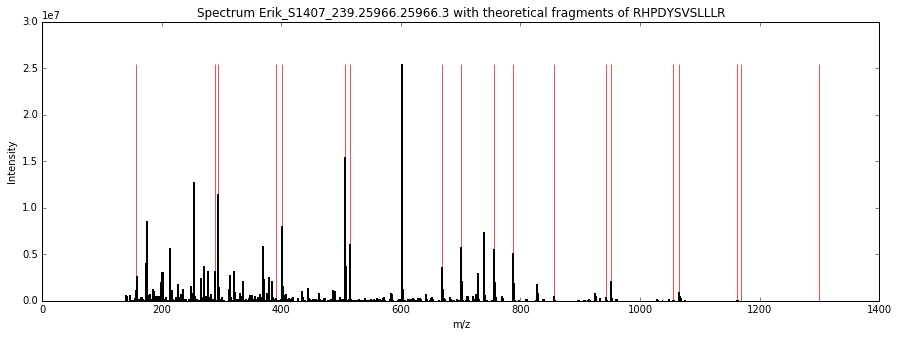

In [7]:
from pyteomics import mgf, mass
import os
import pylab
peptide = 'RHPDYSVSLLLR'
charge = 3
def fragments(peptide): # , types=('b', 'y'), maxcharge=1
    """ This function calculates fragments for a given peptide """
    for i in range(1, len(peptide)-1):
        for ion_type in ('b','y'):
            if ion_type[0] in 'abc':
                yield mass.fast_mass(peptide[:i], ion_type=ion_type, charge=1)
            else:
                yield mass.fast_mass(peptide[i:], ion_type=ion_type, charge=1)
with mgf.read('Erik_S1407_239.25966.25966.3.mgf') as mgf_file:
    spectrum = next(mgf_file)
pylab.figure(figsize=(15,5))
pylab.title('Spectrum Erik_S1407_239.25966.25966.3 with theoretical fragments of ' + peptide)
pylab.xlabel('m/z')
pylab.ylabel('Intensity')
theor_spectrum = list(fragments(peptide))
pylab.bar(theor_spectrum,[spectrum['intensity array'].max()]*len(theor_spectrum),width=0.1, edgecolor='red', alpha=0.7)
pylab.bar(spectrum['m/z array'], spectrum['intensity array'], width=0.1, linewidth=2,edgecolor='black')
pylab.show()

# Use pyopenms to create a ms1 chromatogram

Let us take a closer look at the MS1(primary mass spectrum) chromatogram for the same petide RHPDYSVSLLLR. It is implemented using PyOpenMS, the Python binding for the OpenMS suite. Since it is only available in Python2, we can execute this in Python2 by using the magic function. 

** Note that this can be done much more efficiently using OpenSWATH. 

In [48]:
%%python2
import pyopenms 
import pandas as pd 
import os
msExp = pyopenms.MSExperiment()
input_file = 'Erik_S1407_239.mzML'
fh=pyopenms.FileHandler()
fh.loadExperiment(input_file, msExp)
entries = []
for spectrum in msExp:
    if not spectrum.getMSLevel() == 1:
        continue
    for peak in spectrum:
        if abs(peak.getMZ()-485.94045) > 0.01: # 486.275 , 728.911, 728.40702, 485.94045
            continue
        entries.append({'rt':spectrum.getRT(),'mz':peak.getIntensity()})
chromtable = pandas.DataFrame(entries)
print(chromtable.shape)
chromtable.to_csv("ms1chromatogram.csv",index=False,sep="\t")

In [50]:
ls

Erik_S1407_239.25966.25966.3.mgf  _ursgal_lookup.pkl     protein_peptide.xlsx
Erik_S1407_239.mgf                demo.ipynb             xtandem_vengeance/
Erik_S1407_239.mgf.u.json         mouse_panther12.fasta
Erik_S1407_239.mzML               ms1chromatogram.csv


# Read in the chromatorgram and reduce it in a simple way

In [44]:
import pandas
import numpy
from sqlalchemy import create_engine
engine = create_engine("sqlite:///data.sqlite")
chromt3 = pandas.read_csv("ms1chromatogram.csv",sep="\t")
red = chromt3.groupby(chromt3.rt.apply(numpy.floor)).max()
red = red[['rt','mz']]
red.to_sql(name='reduce_chromatogram',con=engine,index=False,if_exists='replace')

ValueError: No columns to parse from file

# Enable the use of the R interpreter

In [ ]:
%load_ext rpy2.ipython

# Use R to visualize the chromatogram

In [ ]:
%%R
library(RSQLite)
library(ggplot2)
dbh = dbConnect(SQLite(),db='data.sqlite')
df = dbGetQuery(dbh,"SELECT * FROM reduce_chromatogram")
ggplot(df, aes(x = rt, y = mz)) + geom_line()

# Prosit: proteome-wide prediction of peptide tandem mass spectra by deep learning 

Gessulat, Siegfried, et al. "Prosit: proteome-wide prediction of peptide tandem mass spectra by deep learning." Nature methods 16.6 (2019): 509.

The de facto standard approach today is database searching, just like what we have done eaylier with X!tandem, where a fragmentation spectrum is matched to theoretical spectra for candidate petides generated in siloco. 

Most commonly used searche ngines score peptide spectrum matches on the presence of fragment ions but largely disregard **fragment ion intensities regarding which fragment ions may be experimentally observed**. On the other hand, spectral library searching correlate experimental fragment ion intentensities to library spectra. But they are used mostly for targed or data-independent acquisition experiemnts. You would need to have accurate predictions of additional information like peptide retention tme to ensure confident peptide identification in these experiments. **Those models typically are specifric to laboratory conditions** that limits their scope. 

Intorducing Prosit. A deep learning model 

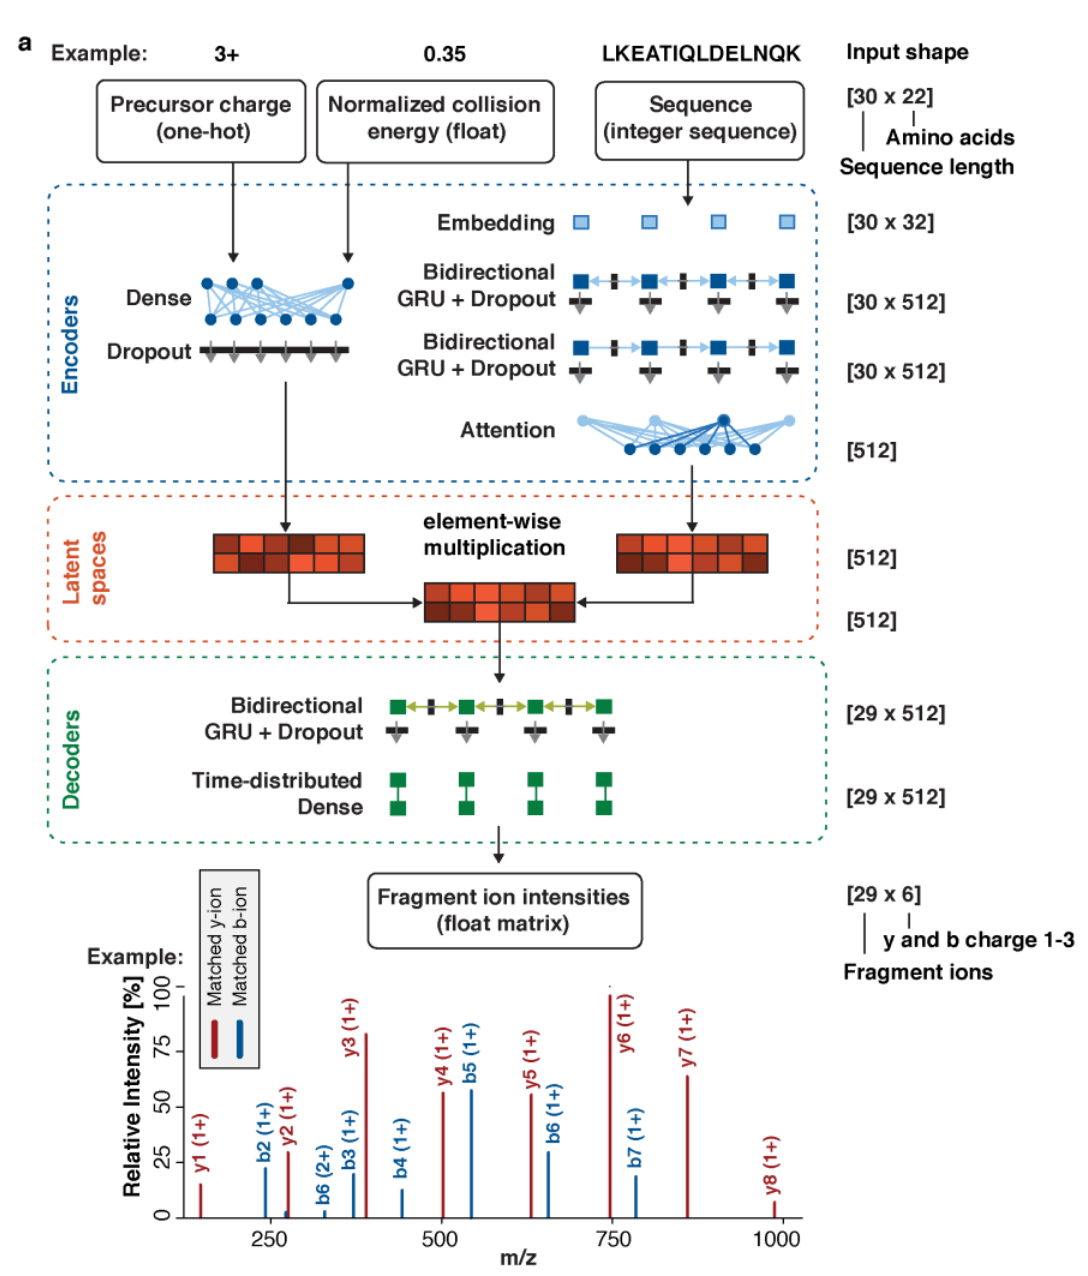

Overview  of  the  neural  network  architecture  of  the  fragment  ion  intensity  prediction  model.  The  model  takes  precursor  charge,normalized  collision  energy  and  the  peptide  sequence  as  input.  First,  for  every  input  a  specific  encoder  is  trained,  consisting  of  one dense layer for precursor charge and normalized collision energy. The encoder for the peptide sequence is split in an embedding layer connected  to  2  bi-directional  recurrent  neural  networks  (BDN)  with  gated  recurrent  memory  (GRU)  units  and  an  attention  layer.  Both encoder representations are element-wise multiplied for a fixed size latent space representation. The decoder for fragment ion intensity prediction consists of one bidirectional GRU resulting in 6 predictions for up to 29 fragmentation positions. The indexed retention time (iRT) model uses the same encoder but dense layers as decoder.

https://github.com/kusterlab/prosit

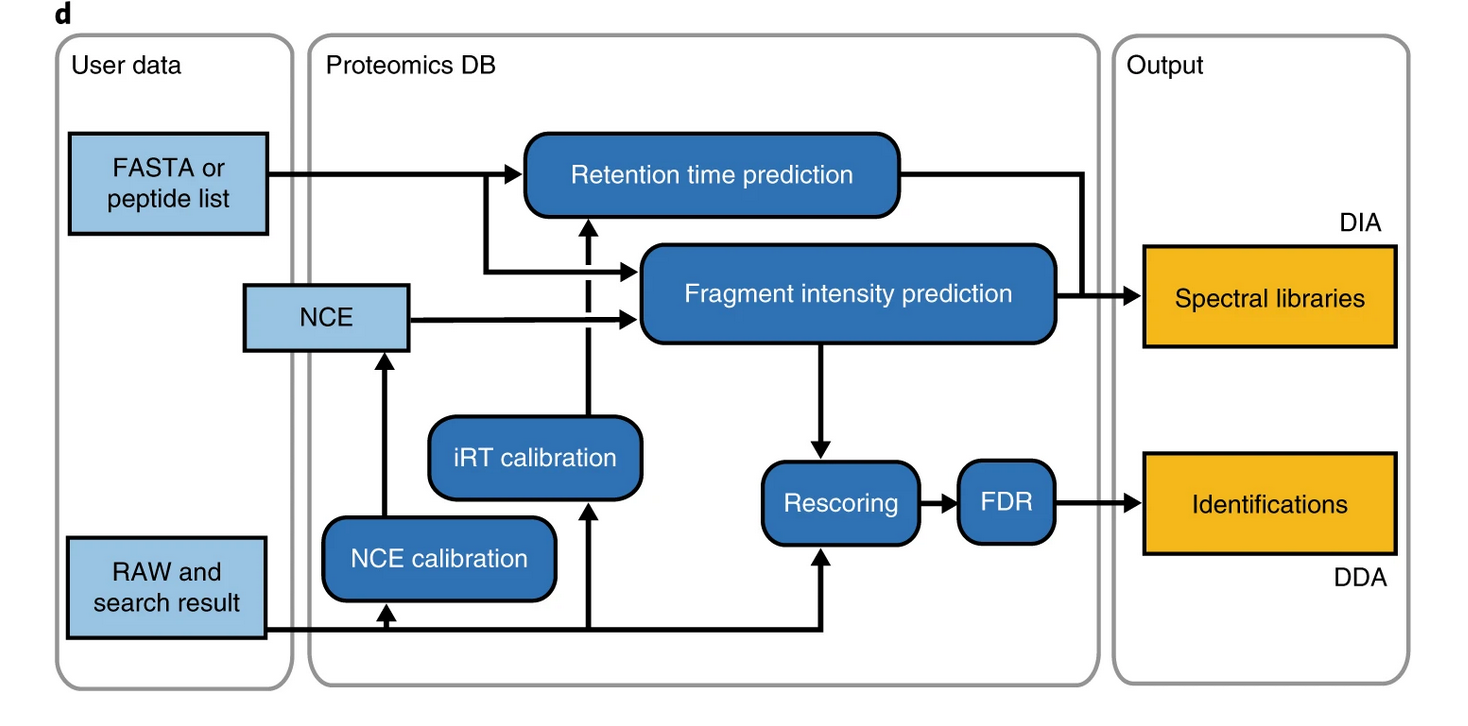

Schematic representation of the integration of Prosit into ProteomicsDB for user access to predictions. Processing options include starting from a peptide list, a raw mass spectrometry file or search result files, to calibrate NCE and align iRT predictions of Prosit to their own data and to request the generation of predictions for a set of peptides, proteins or an entire FASTA file. Prosit can also rescore PSMs from data-dependent acquisition (DDA) experiments.